In [ ]:
!export PATH=/Library/TeX/texbin:$PATH
#!pip install nbconvert

Welcome to the second ML1 exercise. We will build our first neural network, which will have a hidden layer. We will also see how to train a neural network for various purposes. We will recognise the difference between several activation functions. 

**You will learn how to:**
- Implement a 2-class classification neural network with a single hidden layer
- Use units with a non-linear activation function, such as tanh 
- Compute the cross entropy loss 
- Implement forward and backward propagation

**Notation**:
- Superscript $[l]$ denotes a quantity associated with the $l^{th}$ layer. 
    - Example: $a^{[L]}$ is the $L^{th}$ layer activation. $W^{[L]}$ and $b^{[L]}$ are the $L^{th}$ layer parameters.
- Superscript $(i)$ denotes a quantity associated with the $i^{th}$ example. 
    - Example: $x^{(i)}$ is the $i^{th}$ training example.
- Lowerscript $i$ denotes the $i^{th}$ entry of a vector.
    - Example: $a^{[l]}_i$ denotes the $i^{th}$ entry of the $l^{th}$ layer's activations).

## Introduction
In this notebook we will train a neural network with a single hidden layer.

**Here is our neural network**:

<img src="imgs/NN.png" style="width:800px;height:300px;">

### Input layer
Each node in the input layer refers to each feature in the dataset.

### Hidden layers
The next layers after the input layer are where all the magic happens. The hidden layer takes the input layer and applies a non-linear activation function to it. Mathematically, we can represent the function of the hidden layer as follows:
$$f(x) =  \sigma(Wx + b) $$
Where $\sigma $ refers to the non-linear activation function

To keep things simple, we will only use one hidden layer in our model for this notebook. Increasing the number of hidden layers tends to increase the model complexity and training time.

### Output layer
This is the last layer of the neural network.

### Activation functions
When designing the neural network model architecture, we also need to decide what activation functions to use for each layer. Activation functions have an important role to play in neural networks. You can think of activation functions as transformers in neural networks; they take an input value, transform the input value, and pass the transformed value to the next layer. The purpose of the activation function is to introduce non-linearity into the output of a neuron.

**Why do we need non-linear activation functions?**  
A neural network without an activation function is essentially just a linear regression model. The activation function applies a non-linear transformation to the input making it capable to learn and perform more complex tasks.

## Necessary Libraries
first we will import all the packages that are required for this exercise. 
- [numpy](www.numpy.org) is the main package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a library to plot graphs in Python.
- np.random.seed(1) is used to keep all the random function calls consistent. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(1)

#### 1. Linear 
You can interpret this as no activation function. We usually use it in the output layer of regression networks, since we don't want to squash the output into a certain range of numbers.
$$f(x) = x$$

In [2]:
def linear(x):
    return x

def der_linear(x):
    return np.ones_like(x)

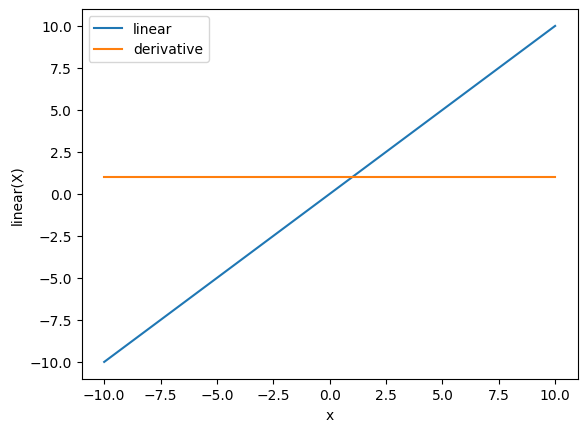

In [3]:
## plot the function 
# Create input from -10 to 10 in 100 steps
x  = np.linspace(-10, 10, 100)
f  = linear(x)
df = der_linear(x)
# Plot the linear layer and its derivative
plt.plot(x, f, label="linear") 
plt.plot(x, df, label="derivative")
plt.xlabel("x") 
plt.ylabel("linear(X)")
plt.legend()
plt.show()

#### 2. Sigmoid
The sigmoid activation function simply takes a value and squashes it between 0 and 1. You can interpret it as the probability of an output prediction. Therefore, we usually use it in the output layer in binary classification networks. Besides that, we sometimes use it in hidden layers. However, it should be noted that the sigmoid function is monotonic but its derivative is not. Hence, the neural network may get stuck at a suboptimal solution. Furthermore, the gradient vanishes in saturation areas.
$$f(x) = \sigma(x) = \frac{1}{1 + e^{-x}}$$
Its derivative 
$$f'(x) = \sigma(x)*(1-\sigma(x)) $$

**Exercise**: Implement the sigmoid function with numpy and the function `np.exp()`.

In [4]:
def sigmoid(x):
    ### START CODE HERE ### (≈ 2 lines of code)
    return 1/(1 + np.exp(-x))
    ### END CODE HERE ###
    

def der_sigmoid(x):
    return sigmoid(x) * (1- sigmoid(x))

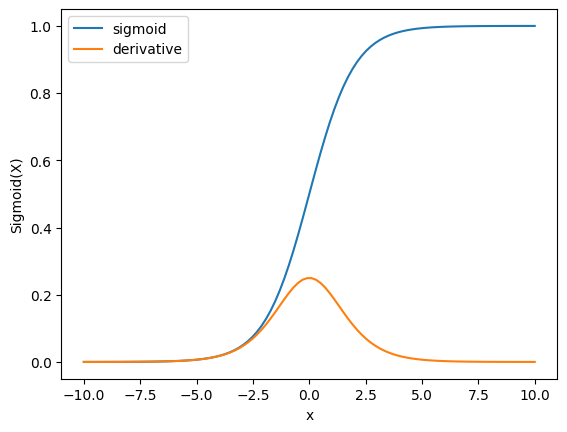

In [5]:
## plot the function 
# Create input from -10 to 10 in 100 steps
x  = np.linspace(-10, 10, 100)
f  = sigmoid(x)
df = der_sigmoid(x)
# Plot the sigmoid layer and its derivative
plt.plot(x, f, label="sigmoid") 
plt.plot(x, df, label="derivative")
plt.xlabel("x") 
plt.ylabel("Sigmoid(X)")
plt.legend()
plt.show()

#### When to use sigmoid: ####
* If you want output values in the range from 0 to 1, use sigmoid as output layer
* If you are doing binary classification problems, use sigmoid

#### Problem with sigmoid: ####
* If the x value is small or big, the sigmoid saturates, creating a vanishing gradient, resulting in no learning

#### 3. Hyperbolic Tangent
The tanh function is another possible activation function that can be used as a non-linear function between layers of a neural network. It actually shares a few things in common with the sigmoid activation function. They both look very similar. But while a sigmoid function will map input values to the range of 0 to 1, thanh will map values between -1 and 1.

$$f(x) = tanh(x) = \frac {sinh(x)}{cosh(x)} = \frac {e^x - e^{-x}}{e^x + e^{-x}}$$

Its derivative 
$$f'(x) = 1 - tanh(x)^2$$

In [6]:
def tanh(x):
    return np.tanh(x)

def der_tanh(x):
    return 1- tanh(x)**2

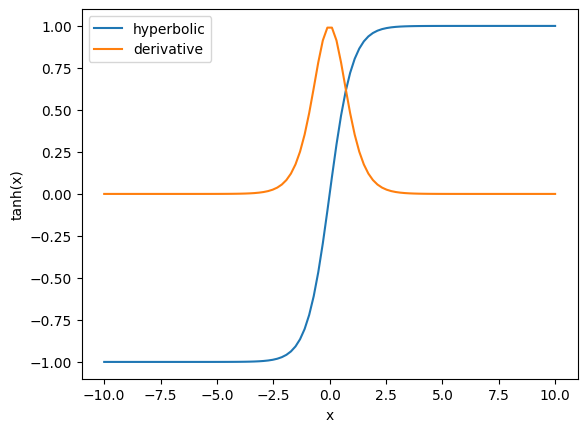

In [7]:
## plot the function 
# Create input from -10 to 10 in 100 steps
x  = np.linspace(-10, 10, 100)
f  = tanh(x)
df = der_tanh(x)
# Plot the tanh layer and its derivative
plt.plot(x, f, label="hyperbolic") 
plt.plot(x, df, label="derivative")
plt.xlabel("x") 
plt.ylabel("tanh(x)")
plt.legend()
plt.show()

#### When to use tanh: ####
* Usually used in hidden layers of a neural network. It helps in centering the data by bringing the mean close to 0. This makes learning for the next layer much easier (Optimization is easier in this method). 

#### Problems with tanh: ####
* Vanishing gradient

#### 4. ReLU
Today, ReLU is the most popular choice of activation function for DNNs, and it has become a default choice for activation functions. Its range is from 0 to infinity, and both the function itself and its derivative are monotonic. One drawback of the ReLU function is that the gradient for negative inputs is zero. This phenomenon is also called "dying ReLU", meaning that the layers connected to this "neuron" will not receive any gradient information and the parameters won't be adjusted. To fix this problem, *Leaky ReLU* was invented to introduce a small slope in the negative part and recover gradient information.
$$f(x) = \max(0,x)$$

The derivative of the ReLU is :
$$f(x)= \begin{cases}1 & \text { if } x > 0 \\ 0 & x <= 0\end{cases}$$

**Instructions**:
- You will compare a vector x with scalar 0 and return a new array containing the element-wise maximum 
    - Use: `numpy.maximum(x, 0)`.
- You will compare vector x with scalar 0 and return a new array containing either ones or zeros
    - Use: `np.where(x <= 0)`.

In [8]:
def relu(x) :
    return np.maximum(x, 0)

def der_relu(x):
    i     = np.where(x <= 0)
    df    = np.ones_like(x)
    df[i] = 0 
    return df

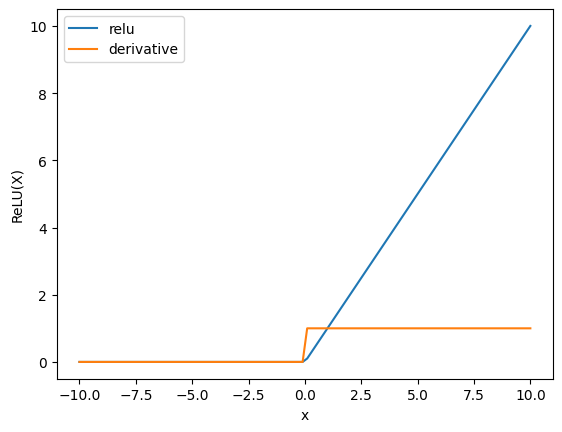

In [9]:
## plot the function 
# Create input from -10 to 10 in 100 steps
x = np.linspace(-10, 10, 100)
f = relu(x)
df = der_relu(x)
# Plot the ReLU layer and its derivative
plt.plot(x, f,  label="relu")
plt.plot(x, df, label="derivative")
plt.xlabel("x") 
plt.ylabel("ReLU(X)")
plt.legend()
plt.show()

#### Problem with ReLU: ####
* The only issue is that the derivative is not defined at $x = 0$, which we can overcome by assigning the derivative to $0$ at $x = 0$. However, this means that for $x <= 0$ the gradient is zero and learning won't take place.

#### 5. Leaky ReLU
Leaky ReLU is an improved version of the ReLU function. Recall that the gradient is 0 for x<0 for a ReLU function, which made the neurons die for activations in that region. The leaky ReLU will instead have a small negative slope (of 0.01, or so), allowing gradient information to propagate to earlier layers. 
$$f(x) = max(0.01x, x)$$

The derivative of the leaky ReLU is :

$$f(x)= \begin{cases}1 & \text { if } x > 0 \\ 0.01 & x <= 0\end{cases}$$

In [10]:
def leaky_relu(x) :
    return np.maximum(x, 0.01*x)

def der_leaky_relu(x):
    i     = np.where(x <= 0)
    df    = np.ones_like(x)
    df[i] = 0.01 
    return df

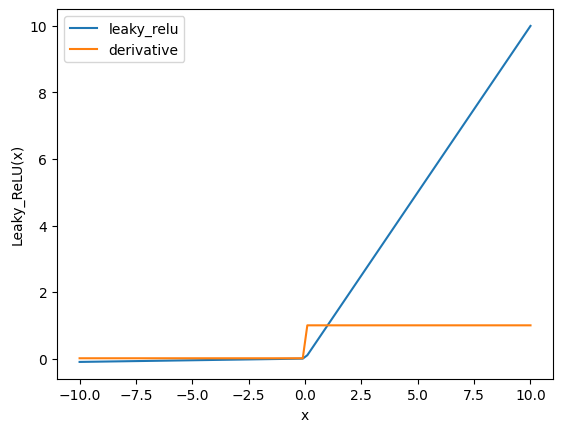

In [11]:
## plot the function
# Create input from -10 to 10 in 100 steps
x = np.linspace(-10, 10, 100)
f = leaky_relu(x)
df = der_leaky_relu(x)
# Plot the leaky ReLU layer and its derivative
plt.plot(x, f,  label="leaky_relu")
plt.plot(x, df, label="derivative")
plt.xlabel("x") 
plt.ylabel("Leaky_ReLU(x)")
plt.legend()
plt.show()

#### 6. Softmax
Softmax is a generalized version of the sigmoid function used for multiclass classification. Hence, we use it in the output layer of multiclass classification networks.

#### Properties of Softmax function ####

1. The calculated probabilities will be in the range from 0 to 1.
2. The sum of all the probabilities equals 1.

In [12]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

In [13]:
x = np.array([2.1, -0.2 , -1.2])
y_probas = softmax(x)
print('Probabilities: ', y_probas)
print('The sum of all probabilities: ', np.sum(y_probas))

Probabilities:  [0.87939764 0.08816739 0.03243497]
The sum of all probabilities:  0.9999999999999999


## Steps to Train a Neural Network from Scratch
General methodology to build neural networks:
1. Define the neural network structure/architecture ( # of input units,  # of hidden units, etc). 
2. Initialize the model's parameters
3. Loop:
    - Forward propagation
    - Compute loss
    - Backward propagation to get the gradients
    - Update parameters (gradient descent, optimizer)

### Forward Pass
On a feedforward neural network, we have a set of input features and initially random weights. The forward pass propagates the input signal through the network all the way to the last layer and outputs a prediction:

**Mathematically**:   
For one example $x^{(i)}$  
$$z^{[1] (i)} =  W^{[1]} x^{(i)} + b^{[1]}\tag{1}$$ 
$$a^{[1] (i)} = \tanh(z^{[1] (i)})\tag{2}$$
$$z^{[2] (i)} = W^{[2]} a^{[1] (i)} + b^{[2]}\tag{3}$$
$$\hat{y}^{(i)} = a^{[2] (i)} = \sigma(z^{ [2] (i)})\tag{4}$$
$$y^{(i)}_{prediction} = \begin{cases} 1 & \text{if } \hat{y}^{(i)} > 0.5 \\ 0 & \text{otherwise } \end{cases}\tag{5}$$

**Diagram**:

<img src="imgs/NN.png" style="width:800px;height:300px;">

### Loss & Empirical Loss
The loss function $\mathcal{L}$ is a performance metric that gives a continuous-valued score, given the prediction $\hat{y}$ of a model and a target value $y$. In other words, it measures the difference between a predicted and desired value for one example. Usually we construct loss functions in such a way, that improving the loss also improves the performance on a desired task. For our binary classificator, we will use the cross entropy loss, defined below:
$$ \mathcal{L}(\hat{y}^{(i)}, y^{(i)}) =  - y^{(i)}  \log(\hat{y}^{(i)}) - (1-y^{(i)} )  \log(1-\hat{y}^{(i)})\tag{6}$$

For supervised learning tasks, we usually use loss functions, that decrease, if the performance on the task improves and increase, if the performance gets worse, assigning a higher loss value.

**Example**:
* Correct classification
  * Label: $(y = 1)$
  * Prediction: $\hat{y} = 1$
  * $\mathcal{L} = 0$
* Wrong classification
  * Label: $(y = 0)$
  * Prediction: $\hat{y} = 1$
  * $\mathcal{L} = \infty$

The empirical loss is the average performance on a set of examples. Usually, we use batch gradient decent and therefore the empirical loss denotes the average performance on a batch of examples.
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(\hat{y}^{(i)}, y^{(i)})\tag{7}$$

### Backward Pass / Backpropagation
The backward pass takes the error at the end of the network, calculated by the loss function, and propagates it through all the layers of the network all the way to the first layer, calculating the gradient for each parameter. Backpropagation is the efficient, recursive implementation of the chain rule to obtain the gradients of all parameters in linear instead of exponential time. Without the backpropagation algorithm, deep neural networks wouldn't be possible.


#### Chain Rule
The chain rule is a fundamental rule of differentiation that allows to calculate the derivative of the composition of two functions.

Simple example:
* $h(x)=f \circ g$
* $\frac{\partial h}{\partial x}=\frac{\partial f}{\partial g} \cdot \frac{\partial g}{\partial x}$

Neural network example: In order to update the parameters, we need to calculate the gradients $dW^{[2]},db^{[2]},dW^{[1]},db^{[1]}$.


<img src="imgs/BP.png" style="width:900px;height:200px;">

1. Chain rule for the parameters's gradients in the second layer:
$$ dW^{[2]} = \frac{\partial \mathcal{L} }{\partial W^{[2]}} = \frac{\partial \mathcal{L} }{\partial a^{[2]}} \frac{\partial a^{[2]} }{\partial z^{[2]}}\frac{\partial z^{[2]} }{\partial W^{[2]}}\tag{8}$$
$$ db^{[2]} = \frac{\partial \mathcal{L} }{\partial b^{[2]}} = \frac{\partial \mathcal{L} }{\partial a^{[2]}} \frac{\partial a^{[2]} }{\partial z^{[2]}}\frac{\partial z^{[2]} }{\partial b^{[2]}}\tag{9}$$

2. Chain rule for the parameters's gradients in the first layer:
$$dW^{[1]} = \frac{\partial \mathcal{L} }{\partial W^{[1]}} =  \frac{\partial \mathcal{L} }{\partial a^{[2]}} \frac{\partial a^{[2]} }{\partial z^{[2]}}\frac{\partial z^{[2]} }{\partial a^{[1]}}\frac{\partial a^{[1]} }{\partial z^{[1]}}\frac{\partial z^{[1]} }{\partial W^{[1]}} \tag{10}$$
$$db^{[1]} = \frac{\partial \mathcal{L} }{\partial W^{[1]}} =  \frac{\partial \mathcal{L} }{\partial a^{[2]}} \frac{\partial a^{[2]} }{\partial z^{[2]}}\frac{\partial z^{[2]} }{\partial a^{[1]}}\frac{\partial a^{[1]} }{\partial z^{[1]}}\frac{\partial z^{[1]} }{\partial b^{[1]}} \tag{11}$$



3. To calculate the gradients for the second layer, we first need to compute gradient of the empirical loss $\frac{\partial \mathcal{L} }{\partial a^{[2]}}$ with respect to its input and the activation function activation $\frac{\partial a^{[2]} }{\partial z^{[2]}}$ with respect to its input.
$$da^{[2]} = \frac{\partial \mathcal{L} }{\partial a^{[2]}} =  - (\frac{y }{a^{[2]}} - \frac{1-y }{1-a^{[2]}})\tag{12}$$
$$dz^{[2]} = \frac{\partial \mathcal{L} }{\partial z^{[2]}}   = \frac{\partial \mathcal{L} }{\partial a^{[2]}}  \frac{\partial a^{[2]} }{\partial z^{[2]}}  = da^{[2]} \sigma'(z^{[2]}) \tag{13}$$

1. We can now calculate the gradients for the parameters of the second layer, based on the previous gradients.
$$  dW^{[2]} = \frac{\partial \mathcal{L} }{\partial W^{[2]}} =  \frac{\partial \mathcal{L}}{\partial z^{[2]}} \frac{\partial z^{[2]} }{\partial W^{[2]}}= dz^{[2]} a^{[1] T} \tag{14}  $$
$$ db^{[2]} =  \frac{\partial \mathcal{L} }{\partial b^{[2]}} =  \frac{\partial \mathcal{L}}{\partial z^{[2]}} \frac{\partial z^{[2]} }{\partial b^{[2]}}= dz^{[2]} \tag{15}  $$



5. To calculate the gradients for the first layer, we first need to compute the gradient of the linear layer $\frac{\partial z^{[2]} }{\partial a^{[1]}}$ with respect to its input and the activation layer $\frac{\partial a^{[1]} }{\partial z^{[1]}}$ with respect to its input.
$$da^{[1]} = \frac{\partial \mathcal{L} }{\partial a^{[1]}} = \frac{\partial\mathcal{L}}{\partial z^{[2]}} \frac{\partial z^{[2]} }{\partial a^{[1]}} = W^{[2] T} dz^{[2]} \tag{16}$$
$$dz^{[1]} = \frac{\partial \mathcal{L} }{\partial z^{[1]}}   = \frac{\partial \mathcal{L} }{\partial a^{[1]}}  \frac{\partial a^{[1]} }{\partial z^{[1]}} = da^{[1]}  \tanh'(z^{[1]}) \tag{17} $$

6. Now we are able to compute the gradients of the parameters in the first layer.
$$ \frac{\partial \mathcal{L} }{\partial W^{[1]}} =  \frac{\partial \mathcal{L}}{\partial z^{[1]}} \frac{\partial z^{[1]} }{\partial W^{[1]}}= dz^{[1]} x^{T} \tag{18}  $$
$$ \frac{\partial \mathcal{L} }{\partial b^{[1]}} =  \frac{\partial \mathcal{L}}{\partial z^{[1]}} \frac{\partial z^{[1]} }{\partial b^{[1]}}= dz^{[1]} \tag{19}  $$

### Gradient Descent
The optimizer uses the gradient information to update all the parameters with a new value, ideally improving the loss in the next iteration. Gradient descent is an iterative first order optimization algorithm that tries to find a local optimum of an objective function by adjusting a set of model parameters. It calculates the direction of steepest ascent of the loss surface and goes into the opposite direction. It takes into account, a user-defined learning rate, and an initial set of parameter values.

Working: (Iterative)
1. Start with initial parameter values.
2. Calculate forward pass.
3. Calculate empirical loss.
4. Calculate the backward pass
   1. Calculate the parameter gradients, the direction of steepest ascent
   2. Update parameter values using the update function and learning rate.
5. Go to 6., if a certain empirical loss value is reached, otherwise go to 2.
6. Returns minimized costs and set of optimal parameters.

Update rule:
$$ W^{[l]} = W^{[l]} - \alpha \text{ } dW^{[l]} \tag{20}$$
$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} \tag{21}$$

where $\alpha$ is the learning rate and $l \in \{1,2\}$.

<img src="imgs/GD.jpg" style="width:350px;height:250px;"> 

## Implementation
In this practical session, we will start with the implementation of a shallow 2 layer network for binary classification, which we will build from scratch.

### Load Data
We will be using numpy to load the data set, which is contained in serialized array objects (.npy).

### Overview of the Data Set
For this exercise, we will use the "Sign Language Digit Data Set". In this data set, there are 2062 sign language digit images (64x64px). You know that the numbers are from 0 to 9, so there are ten unique characters. 

To start the exercise: We will use only the symbols 0 and 1 for simplicity. 

Data layout:
* Examples displaying the number zero have indices between 204 and 408 (205 examples)
* Examples displaying the number one have indices between 822 and 1027 (206 examples)
* We will use 205 samples from each class

**Note:** 205 samples are tiny for deep learning. But since it is a tutorial, it is not that important.


Lets prepare our X and Y arrays, in which the data set should reside. X should be the image arrays and Y should be the label array.

In [ ]:
# load data set
x_l = np.load('./data/X.npy')
Y_l = np.load('./data/Y.npy')
img_size = 64
plt.subplot(1, 2, 1)
plt.imshow(x_l[260].reshape(img_size, img_size),cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(x_l[900].reshape(img_size, img_size),cmap='gray')
plt.axis('off')
plt.show()

#### Preprocess the Data Set
* Choose the examples that display the number zero and one and concatenate them to a new array X and Y respectively
* Flatten X and Y for convenience
* Create a train and test set by splitting the data

The final training data set should look like this:

<img src="imgs/example.png" style="width:500px;height:500px;">

Choose the examples that display the number zero and one and concatenate them to a new array X. Create the corresponding label array for Y.

In [ ]:
# Join the input images that display zeros and ones along the row axis.
# Results in X with indices 0 to 204 being zero sign examples and indices 205 to 410 being one sign examples.
X = np.concatenate((x_l[204:409], x_l[822:1027] ), axis=0)
# Create the output data, the array of the labels.
Y_zeros = np.zeros(205)
Y_ones = np.ones(205)
Y = np.concatenate((Y_zeros, Y_ones), axis=0).reshape(X.shape[0],1)
print("X shape: " , X.shape)
print("Y shape: " , Y.shape)

The shape of X is (410, 64, 64):
* 410 images
* 64, 64 is the size of the images (64x64 pixels)

The shape of the Y is (410,1):
* 410 labels (0 and 1)
* 1, size of each label (scalar)

Lets split X and Y into train and test sets, by randomizing the data and splitting it.

In [ ]:
# Then lets create x_train, y_train, x_test, y_test arrays
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]
print("Number of samples in the training data set: " , number_of_train)
print("Number of samples in the test data set: " , number_of_test)

* `test_size` = Percentage of test size.
* `random_state` = Use same seed while randomizing. It means that if we call train_test_split repeatedly, it always * creates the same train and test distribution because we randomize with a fixed random_state.

Since our neural network accepts only 2-dimensional inputs, we need to flatten the images in the input array from 64x64 to 4096. Our label array Y is already a 2-dimensional array, so we leave it like that.

In [ ]:
X_train_flatten = X_train.reshape(number_of_train, X_train.shape[1]*X_train.shape[2])
X_test_flatten = X_test.reshape(number_of_test, X_test.shape[1]*X_test.shape[2])
print("X train flatten", X_train_flatten.shape)
print("X test flatten", X_test_flatten.shape)

Now we need to transpose the data in order to process it with the neural network. We want each sample as a column vector.

In [ ]:
x_train = X_train_flatten.T
x_test = X_test_flatten.T
y_train = Y_train.T
y_test = Y_test.T
print("x train: ", x_train.shape)
print("x test: ", x_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)

In [ ]:
x_train[0].shape

### Neural Network Architecture and Forward Pass
**Exercise:**
The forward pass computes all steps from the input to the final prediction by propagating the data through the network. Use equations (1)-(5) and the helper functions `tanh()` and `sigmoid()` to implement it.

In [ ]:
def forward_propagation(X, parameters):
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    # Implement the forward pass of the NN architecture to calculate the final output a2 (class probability)
    ### START CODE HERE ### (≈ 4 lines of code)
    z1 = np.dot(W1, X) + b1
    a1 = tanh(z1)
    z2 = np.dot(W2, a1) + b2
    a2 = sigmoid(z2)
    ### END CODE HERE ###
        
    # Test if the shapes are correct
    assert(a2.shape == (1, X.shape[1]))
    cache = {"z1": z1,
             "a1": a1,
             "W1": W1,
             "b1": b1,
             "z2": z2,
             "a2": a2,
             "W2": W2,
             "b2": b2}    
    return a2, cache

### Parameter Initialization
Before we can start optimizing the weights/parameters of our neural network, we first need to initialize them with an initial value. Initialization can matter a lot for neural networks an decide if a network is able to learn a certain task or not.
We will initialize the weights with values from an uniform distribution. The number of parameters we have to initialize is: 
* $n_x$ -- size of the input layer
* $n_h$ -- size of the hidden layer
* $n_y$ -- size of the output layer

**Exercise**: Implement the function `initialize_parameters()`, which will be used to initialize the parameters for our two layer network.

**Remember** that when we compute $W X + b$ in numpy, broadcasting is applied to fit mismatching array dimensions. For example, if: 

$$ W = \begin{bmatrix}
    j  & k  & l\\
    m  & n & o \\
    p  & q & r 
\end{bmatrix}\;\;\; X = \begin{bmatrix}
    a  & b  & c\\
    d  & e & f \\
    g  & h & i 
\end{bmatrix} \;\;\; b =\begin{bmatrix}
    s  \\
    t  \\
    u
\end{bmatrix}\tag{22}$$

Then $WX + b$ will be:

$$ WX + b = \begin{bmatrix}
    (ja + kd + lg) + s  & (jb + ke + lh) + s  & (jc + kf + li)+ s\\
    (ma + nd + og) + t & (mb + ne + oh) + t & (mc + nf + oi) + t\\
    (pa + qd + rg) + u & (pb + qe + rh) + u & (pc + qf + ri)+ u
\end{bmatrix}\tag{23}  $$


**Instructions**:
- Make sure your parameters' sizes are right. Refer to the neural network figure above if needed.
- You will initialize the weight matrices with random values from a uniform distribution. 
    - Use: `np.random.randn(a,b) * 0.01` to randomly initialize a matrix of shape (a,b).
- You will initialize the bias vectors with zeros. 
    - Use: `np.zeros((a,b))` to initialize a matrix of shape (a,b) with zeros.

In [ ]:
def initialize_parameters(layers_dims, init_method ="random"):
    np.random.seed(1)
    # n_x -- size of the input layer
    # n_h -- size of the hidden layer
    # n_y -- size of the output layer
    n_x, n_h, n_y = layers_dims
    if init_method == "random":
        ### START CODE HERE ### (≈ 4 lines of code)
        W1 = np.random.randn(n_h, n_x) * 0.01
        b1 = np.zeros(shape=(n_h, 1))
        W2 = np.random.randn(n_y, n_h) * 0.01
        b2 = np.zeros(shape=(n_y, 1))
        ### END CODE HERE ###
    elif init_method == "xavier":
        W1 = np.random.randn(n_h,n_x) * np.sqrt(1/n_h)
        b1 = np.zeros(shape=(n_h, 1))
        W2 = np.random.randn(n_y,n_h)
        b2 = np.zeros(shape=(n_y, 1))
    elif init_method == "zeros":
        W1 = np.zeros(shape=(n_h, n_x))
        b1 = np.zeros(shape=(n_h, 1))
        W2 = np.zeros(shape=(n_y, n_h))
        b2 = np.zeros(shape=(n_y, 1))
    
    # Test if the shape is correct
    assert(W1.shape == (n_h, n_x))
    assert(b1.shape == (n_h, 1))
    assert(W2.shape == (n_y, n_h))
    assert(b2.shape == (n_y, 1))
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters 

Test Code:

In [ ]:
n_x=3 
n_h=2 
n_y=1
layers_dims = [n_x,n_h,n_y]
parameters = initialize_parameters(layers_dims, init_method = "random")
print(f"W1 = \n {parameters['W1']}")
print(f"b1 = \n {parameters['b1']}")
print(f"W2 = \n {parameters['W2']}")
print(f"b2 = \n {parameters['b2']}")

In [ ]:
parameters = initialize_parameters(layers_dims, init_method = "xavier")
print(f"W1 = \n {parameters['W1']}")
print(f"b1 = \n {parameters['b1']}")
print(f"W2 = \n {parameters['W2']}")
print(f"b2 = \n {parameters['b2']}")

### Loss Function
**Exercise:**
Implement the loss function according to equation (6) and (7). This function takes the output a2 of `forward_propagation()` and the true label Y as input and returns the loss.
Be careful: The cross entropy loss can produce NANs, use `np.nansum()` for the empirical loss to ignore them.

In [ ]:
def compute_loss(a2, Y):
    m = Y.shape[1]
    ### START CODE HERE ### (≈ 2 lines of code)
    loss = np.multiply(-np.log(a2),Y) + np.multiply(-np.log(1 - a2), 1 - Y)
    empirical_loss = 1/m * np.nansum(loss)
    ### END CODE HERE ###
    return empirical_loss

### Backpropagation
**Exercise:**
Backpropagation is all steps from cost calculation to calculation of the gradient, use the equations (11)-(18) and the help functions `der_tanh` and `der_sigmoid` to implement it.

In [ ]:
def backward_propagation(X, Y, cache):
    m = X.shape[1]
    # Retrieve each variable from the dictionary "cache"
    z1 = cache['z1']
    a1 = cache['a1']
    W1 = cache['W1']
    b1 = cache['b1']
    z2 = cache['z2']
    a2 = cache['a2']
    W2 = cache['W2']
    b2 = cache['b2']
    
    ### START CODE HERE ### (8 line of code) 
    # Initialize backpropagation with the gradient of the empirical loss da2.
    da2 =  - 1/m * (np.divide(Y, a2) - np.divide(1 - Y, 1 - a2))
    
    # 2. layer (sigmoid -> linear) gradients. Calculate the gradient dz2
    dz2 = np.multiply(da2, der_sigmoid(z2))
    
    # Calculate the gradients of the parameters for the 2. layer dW2 and db2. (approx. 2 lines)
    dW2 = np.dot(dz2, a1.T)
    db2 = np.sum(dz2, axis=1, keepdims = True)
    
    # Calculate the gradient for da1. linear z2 -> activation a2
    da1 = np.dot(W2.T, dz2)
    
    # 1. layer (tanh -> linear) gradients. Calculate the gradient dz1
    dz1 = np.multiply(da1, der_tanh(z1))
    
    # Calculate the gradients of the parameters for the 1. layer dW1 and db1. (approx. 2 lines)
    dW1 = np.dot(dz1, X.T)
    db1 = np.sum(dz1, axis=1, keepdims = True)
    ### END CODE HERE ###
        
    # Test if the shape correct is
    assert (da2.shape == a2.shape)
    assert (dz2.shape == z2.shape)
    assert (dW2.shape == W2.shape)
    assert (db2.shape == b2.shape)
    assert (da1.shape == a1.shape)
    assert (dz1.shape == z1.shape)
    assert (dW1.shape == W1.shape)
    assert (db1.shape == b1.shape)
    gradients = {"da2": da2, "dz2": dz2, "dW2": dW2, "db2": db2,
                 "da1": da1, "dz1": dz1, "dW1": dW1, "db1": db1}
    
    return gradients

### Parameter Update

**Exercise**: Implement the update rule using gradient descent. You have to use (dW1, db1, dW2, db2) in order to update (W1, b1, W2, b2).

**General gradient descent rule**: $ \theta = \theta - \alpha \frac{\partial J }{ \partial \theta }$, where $\alpha$ is the learning rate and $\theta$ represents all parameters.

In [ ]:
def update_parameters(parameters, grads, learning_rate):
    n = len(parameters) // 2 # number of layers in the neural networks

    # Update rule for each parameter
    for k in range(n):
        parameters["W" + str(k+1)] = parameters["W" + str(k+1)] - learning_rate * grads["dW" + str(k+1)]
        parameters["b" + str(k+1)] = parameters["b" + str(k+1)] - learning_rate * grads["db" + str(k+1)]
        
    return parameters

###  Prediction

In order to measure the accuracy during training and to predict which sign is displayed with the trained model (a zero or a one), we create a `predict()` function.
We use `forward_propagation()` to predict our results.

**Reminder**: $$y^{(i)}_{prediction} = \begin{cases} 1 & \text{if } \hat{y}^{(i)} > 0.5 \\ 0 & \text{otherwise } \end{cases}\tag{5}$$
    
As an example, if you would like to set the entries of a matrix X to 0 and 1 based on a threshold you would do: ```X_new = (X > threshold)```

In [ ]:
def predict(X, parameters):
    # Prediction for one image or for a batch of images  
    m = X.shape[1]  # batch of images      
    p = np.zeros((1,m), dtype=int)
    
    # Forward propagation
    a2, caches = forward_propagation(X, parameters)
    
    # Convert probabilities to 0/1 predictions
    for i in range(0, a2.shape[1]):
        if a2[0, i] > 0.5:
            p[0, i] = 1
        else:
            p[0, i] = 0
            
    return p

### Optimization
Now we want to train our model. Therefore we need to combine all functions to implement the forward and backward pass.

1. Forward pass
2. Estimate empirical loss
3. Backward pass (backpropagation)
4. Update parameters
5. Start at 1. if stopping criterion is not met

**Exercise:** Write down the optimization function. The goal is to learn the optimal setting of $W$ and $b$ by minimizing the empirical loss $J$.

In [ ]:
def optimize(X, Y, learning_rate = 0.01, num_iterations = 15000, print_cost = True, initialization = "random"):
    grads      = {}
    losses      = []  # to keep track of the loss
    accuracies = []  # to keep track of the accuracy
    m = X.shape[1]  # number of examples
    layers_dims = [X.shape[0], 10, 1]
    
    # Initialize parameter dictionary.
    if initialization == "zeros":
        parameters = initialize_parameters(layers_dims, init_method ="zeros")
    elif initialization == "random":
        parameters = initialize_parameters(layers_dims, init_method ="random")
    elif initialization == "xavier":
        parameters = initialize_parameters(layers_dims, init_method ="xavier")

    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: linear -> ReLU -> linear -> ReLU -> linear -> sigmoid.
        a2, cache = forward_propagation(X, parameters)
        
        # Loss
        loss = compute_loss(a2, Y)

        # Backward propagation.
        grads = backward_propagation(X, Y, cache)
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print the loss every 100 iterations
        if print_cost and i % 100 == 0:
            print("-------------------------------------------")
            print(f"Iteration: {i}")
            print(f"Empirical loss: {loss}")
            p = predict(X, parameters)
            accuracy = np.mean(p[0,:] == Y[0,:])
            print(f"Accuracy: {accuracy}")
            losses.append(loss)
            accuracies.append(accuracy)
            
    # plot the loss, accuracy
    fig1, (ax1, ax2) = plt.subplots(figsize=(10,12), nrows=2, ncols=1)
    ax1.plot(losses)
    ax1.set_ylabel('empirical loss')
    ax1.set_xlabel('iterations (per hundreds)')
    ax1.set_title("Learning rate =" + str(learning_rate))
    ax2.plot(accuracies)
    ax2.set_ylabel('accuracy')
    ax2.set_xlabel('iterations (per hundreds)')
    ax2.set_title("Learning rate =" + str(learning_rate))
    plt.show()
    return parameters

In [ ]:
parameters = optimize(x_train, y_train, learning_rate = 0.01, num_iterations = 10000, print_cost = True, initialization = "random")

### Testing

With the trained model, we can now predict unseen instances of hand signs. In other words, which number has been displayed, zero or one, given an image.

In [ ]:
t = 0
plt.imshow(X_test[t].reshape(img_size, img_size), cmap='gray')
plt.show()
real_image = X_test[t]
prep_image = np.expand_dims(x_test[:, t], axis=1)
p = predict(prep_image, parameters) 
print(f"Model prediction: {int(p)}")

Accuracy on the test data set:

In [ ]:
p = predict(x_test, parameters)
accuracy = np.mean(p[0,:] == y_test[0,:])
print(f"Accuracy: {accuracy}")

## Further analysis

#### 1. Choice of learning rate

**Reminder**:
The learning rate $\alpha$  determines how rapidly we update the parameters. If the learning rate is too large we may "overshoot" the optimal value. Similarly, if it is too small we will need too many iterations to converge to the best values. That's why it is crucial to use a well-tuned learning rate.

Let's compare the learning curve of our model with several choices of learning rates. This should take about 1 minute. Feel free also to try different values than the three we have initialized the `learning_rates` variable to contain, and see what happens. 

#### 2. Varying the hidden layer size ####
In the example above we picked a hidden layer size of 10. Let’s now get a sense of how varying the hidden layer size can affect the result.

#### 3. Preventing overfitting in neural networks ####

#### Dropout #### 

Means ignoring a certain set of hidden nodes during the learning phase of a neural network, they are dropped out. These hidden nodes are chosen randomly given a specified probability. In the forward pass during a training iteration, the randomly selected nodes are temporarily not used in calculating the loss; in the backward pass, the randomly selected nodes are not updated temporarily.

#### Early stopping ####
As the name implies, training a network with early stopping will end if the model performance doesn't improve for a certain number of iterations. The model performance is measured on a validation set that is different from the training set, in order to assess how well it generalizes. During training, if the performance degrades after several (let's say 50) iterations, it means the model is overfitting and not able to generalize well anymore. Hence, stopping the learning early in this case helps prevent overfitting.

### Exercises

1. Instead of gradient descent, we could use stochastic gradient descent or mini batch gradient descent to train the network. Mini batch gradient descent typically performs better in practice.
2. We used a fixed learning rate $\alpha$ for gradient descent. Implement an annealing schedule for the gradient descent learning rate.
3. We used a $\tanh$ activation function for our hidden layer. We could experiment with other activation functions (some are mentioned above). Note that changing the activation function also means changing the backpropagation derivative.
4. Extend the network from two to three classes. You will need to generate an appropriate dataset for this and also use the Softmax activation function in the last layer.
5. Extend the network to four layers. Experiment with the layer size. Adding another hidden layer means you will need to adjust both the forward propagation as well as the backpropagation code.

## References
1. https://www.geeksforgeeks.org/activation-functions/
2. https://medium.com/@omkar.nallagoni/activation-functions-with-derivative-and-python-code-sigmoid-vs-tanh-vs-relu-44d23915c1f4
3. https://maelfabien.github.io/deeplearning/act/#linear-activation
4. Deep Learning Specialization on Coursera
5. https://github.com/Kulbear/deep-learning-coursera
6. https://www.kaggle.com/kanncaa1/deep-learning-tutorial-for-beginners